In [20]:
!nvidia-smi

Tue Feb  2 02:49:36 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 410.104      Driver Version: 410.104      CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla V100-DGXS...  On   | 00000000:07:00.0 Off |                    0 |
| N/A   49C    P0    53W / 300W |  23649MiB / 32478MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  Tesla V100-DGXS...  On   | 00000000:08:00.0 Off |                    0 |
| N/A   48C    P0    58W / 300W |    321MiB / 32478MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  T

In [1]:
# using gpu:/1
import tensorflow as tf
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_memory_growth(gpus[0], True)
  except RuntimeError as e:
    print(e)

In [2]:
import tensorflow as tf
from keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,AveragePooling2D,Flatten,Dropout
from tensorflow import keras

base_model = keras.applications.ResNet152(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3)
)

base_model.trainable = False

inputs = keras.Input(shape=(224, 224, 3))
# Separately from setting trainable on the model, we set training to False 
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
# x = keras.layers.Dense(512, activation='relu')(x)
# x = keras.layers.Dropout(0.2)(x)
# A Dense classifier with a single unit 
outputs = keras.layers.Dense(7)(x)
model = keras.Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
resnet152 (Functional)       (None, 7, 7, 2048)        58370944  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 7)                 14343     
Total params: 58,385,287
Trainable params: 14,343
Non-trainable params: 58,370,944
_________________________________________________________________


In [3]:
model.compile(optimizer = keras.optimizers.Adam(),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# create a data generator
datagen = ImageDataGenerator(
        rescale=1./255
)

In [5]:
# load and iterate training dataset

seed = 1
    
train_it = datagen.flow_from_directory('../sungjin/tooth/train',
                                       seed = seed,
                                       target_size=(224, 224), 
                                       class_mode='categorical', 
                                       batch_size=32)
# load and iterate test dataset
test_it = datagen.flow_from_directory('../sungjin/tooth/test',
                                      seed = seed,
                                      target_size=(224, 224),
                                      class_mode='categorical', 
                                      batch_size=32)

Found 3230 images belonging to 7 classes.
Found 386 images belonging to 7 classes.


In [6]:
history = model.fit(train_it, steps_per_epoch=20, validation_data=test_it, validation_steps=10, epochs=20)

Epoch 1/20
20/20 [==============================] - 63s 3s/step - loss: 9.5551 - accuracy: 0.2216 - val_loss: 5.6945 - val_accuracy: 0.2281
Epoch 2/20
20/20 [==============================] - 43s 2s/step - loss: 9.3738 - accuracy: 0.2344 - val_loss: 10.3257 - val_accuracy: 0.2500
Epoch 3/20
20/20 [==============================] - 43s 2s/step - loss: 10.3146 - accuracy: 0.2021 - val_loss: 7.6561 - val_accuracy: 0.2375
Epoch 4/20
20/20 [==============================] - 43s 2s/step - loss: 8.6238 - accuracy: 0.1811 - val_loss: 8.5124 - val_accuracy: 0.2438
Epoch 5/20
20/20 [==============================] - 43s 2s/step - loss: 8.3081 - accuracy: 0.2617 - val_loss: 8.7138 - val_accuracy: 0.2188
Epoch 6/20
20/20 [==============================] - 43s 2s/step - loss: 8.6526 - accuracy: 0.2391 - val_loss: 8.9657 - val_accuracy: 0.2406
Epoch 7/20
20/20 [==============================] - 54s 3s/step - loss: 8.2200 - accuracy: 0.2395 - val_loss: 8.7138 - val_accuracy: 0.2313
Epoch 8/20
20/20 [

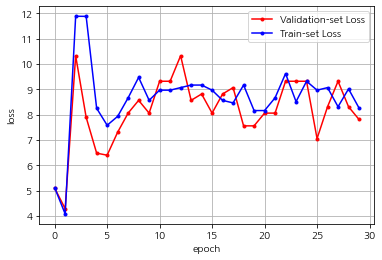

In [17]:
import numpy as np
import matplotlib.pyplot as plt

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))


plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

No handles with labels found to put in legend.


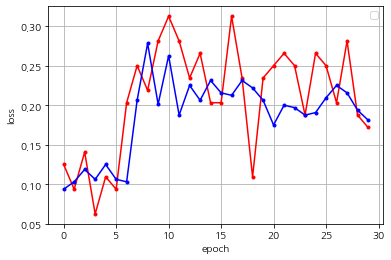

In [18]:
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']

x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red')
plt.plot(x_len, y_acc, marker='.', c='blue')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [21]:
base_model.trainable = True

model.compile(optimizer = keras.optimizers.Adam(lr = .00001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
history = model.fit(train_it, steps_per_epoch=20, validation_data=test_it, validation_steps=10, epochs=10)

Epoch 1/10
20/20 [==============================] - 44s 2s/step - loss: 8.6131 - accuracy: 0.2297 - val_loss: 9.0161 - val_accuracy: 0.2281
Epoch 2/10
20/20 [==============================] - 43s 2s/step - loss: 9.0161 - accuracy: 0.2313 - val_loss: 8.9153 - val_accuracy: 0.2281
Epoch 3/10
20/20 [==============================] - 43s 2s/step - loss: 8.5879 - accuracy: 0.2031 - val_loss: 8.4116 - val_accuracy: 0.2156
Epoch 4/10
20/20 [==============================] - 43s 2s/step - loss: 8.9938 - accuracy: 0.2398 - val_loss: 9.1672 - val_accuracy: 0.2500
Epoch 5/10
20/20 [==============================] - 43s 2s/step - loss: 8.5879 - accuracy: 0.2203 - val_loss: 8.5627 - val_accuracy: 0.2281
Epoch 6/10
20/20 [==============================] - 43s 2s/step - loss: 8.7894 - accuracy: 0.2250 - val_loss: 9.0161 - val_accuracy: 0.2313
Epoch 7/10
20/20 [==============================] - 43s 2s/step - loss: 9.1420 - accuracy: 0.2266 - val_loss: 8.9153 - val_accuracy: 0.2438
Epoch 8/10
20/20 [==

In [21]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}